In [1]:
#|default_exp app
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

from IPython.display import Audio
from tqdm import tqdm
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from pathlib import Path
from multiprocessing import Pool
import os
import shutil
import pandas as pd
import librosa
from scipy.io import wavfile
import gradio as gr 


In [2]:
#|export
def log_mel_spec_tfm(fname, src_path, dst_path):
    os.makedirs(str(dst_path), exist_ok = True)
    y, sr = librosa.load(str(src_path/fname), mono=True)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                  sr=sr)
    plt.savefig(str(dst_path/fname[:-4]) + '.png')
    plt.close()
    return img

In [8]:
#|export
learn = load_learner('model.pkl')
learn.remove_cb(ProgressCallback)

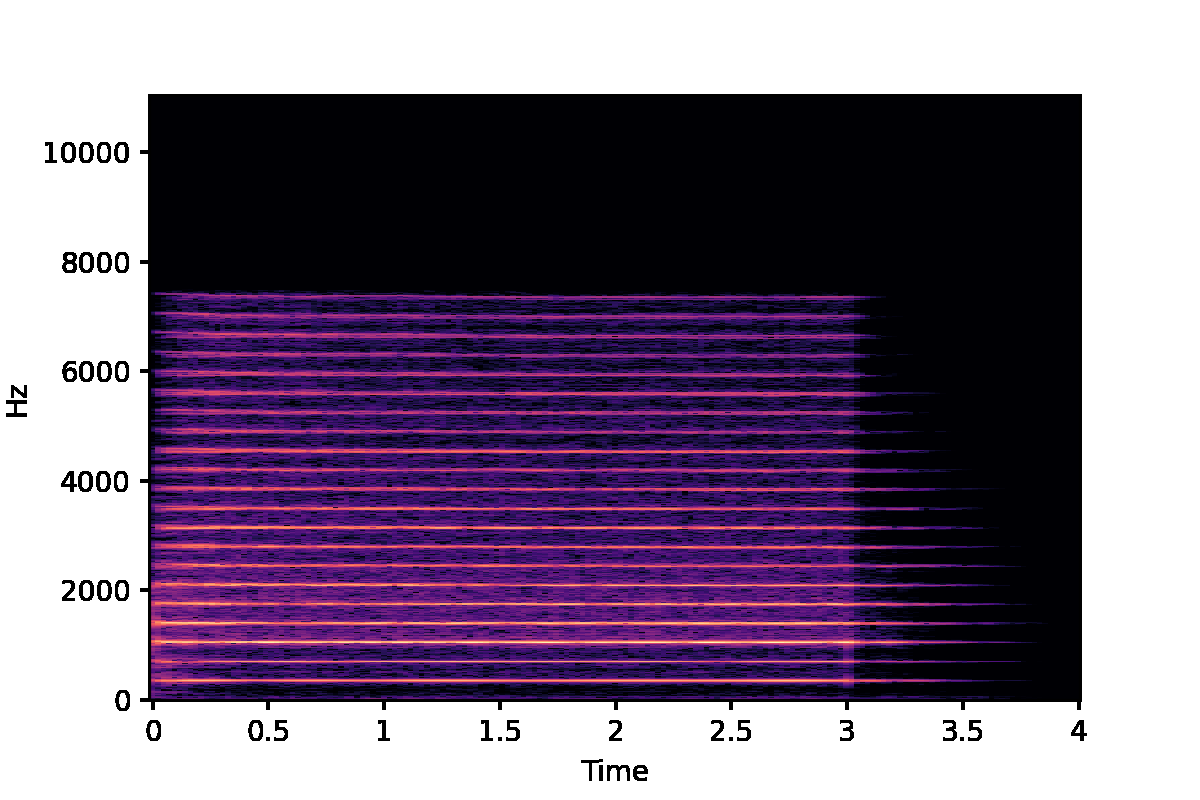

In [9]:
im = PILImage.create('brass_acoustic_006-065-127.png')
im.to_thumb(128, 128)
im

In [10]:
pred,pred_idx,probs = learn.predict('brass_acoustic_006-065-127.png')

In [43]:
#|export
categories = ('Brass', 'Flute', 'Guitar', 'Keyboard', 'Mallet', 'Reed', 'String', 'Vocal')

def classify_aud(aud):
    log_mel_spec_tfm(aud, Path('.'), Path('.'))
    img_fname = str(aud[:-4]) + '.png'
    pred, idx, probs = learn.predict(img_fname)
    return dict(zip(categories, map(float, probs)))

In [44]:
examples = ['test/' + f.name for f in Path('test').iterdir() if '.wav' in f.name]

In [45]:
#|export
aud = gr.Audio(source="upload", type="numpy")
examples = ['test/' + str(f.name) for f in Path('test').iterdir()]

intf = gr.Interface(fn = classify_aud, inputs = aud, outputs = "label", examples = examples)
intf.launch(inline = False)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/unnikrishnannambiar/anaconda3/lib/python3.9/site-packages/gradio/routes.py", line 394, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/unnikrishnannambiar/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 1075, in process_api
    result = await self.call_function(
  File "/Users/unnikrishnannambiar/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 884, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/unnikrishnannambiar/anaconda3/lib/python3.9/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/Users/unnikrishnannambiar/anaconda3/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/Users/unnikrishnannambiar/anaconda3/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = c

In [42]:
classify_aud(examples[0])

{'Brass': 0.9737632274627686,
 'Flute': 0.0005705727962777019,
 'Guitar': 0.0003936725261155516,
 'Keyboard': 8.023933332879096e-05,
 'Mallet': 0.00018948115757666528,
 'Reed': 0.003466952359303832,
 'String': 0.021366966888308525,
 'Vocal': 0.00016905248048715293}

AttributeError: 'QuadMesh' object has no attribute 'read'